In [14]:
from __future__ import division
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML

First, let's run through the basics

In [2]:
import MarchMadnessMonteCarlo as MMMC
teams = MMMC.teams['south']
b = MMMC.Bracket(teams=teams,T=0.5)
print b

Duke (1)                                                     
Robert Morris (16)        Duk (1)                            
San Diego St. (8)                                            
St. John's (9)            San (8)  San (8)                   
Utah (5)                                                     
Stephen F. Austin (12)    Uta (5)                            
Georgetown (4)                                               
Eastern Washington (13)   Geo (4)  Geo (4)  San (8)          
SMU (6)                   SMU (6)  Iow (3)  Iow (3)  San (8) 
UCLA (11)                                                    
Iowa St. (3)              Iow (3)                            
UAB (14)                                                     
Iowa (7)                  Iow (7)  Gon (2)                   
Davidson (10)                                                
Gonzaga (2)               Gon (2)                            
North Dakota St. (15)                                        
Total br

Lowest energy bracket
Kentucky (1)                               
Arizona (2)               Ken (1)          
Villanova (1)             Vil (1)  Ken (1) 
Duke (1)                                   
Total bracket energy: -3.05298233739

Most common bracket (145)
Kentucky (1)                               
Arizona (2)               Ken (1)          
Villanova (1)             Duk (1)  Ken (1) 
Duke (1)                                   
Total bracket energy: -3.03501623224



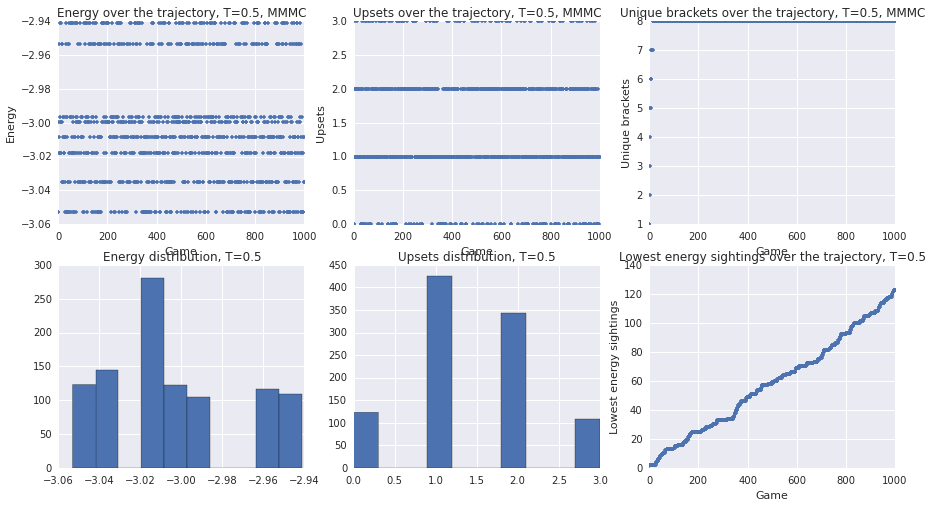

In [3]:
import MarchMadnessMonteCarlo as MMMC
sr = MMMC.simulate(1000,['Kentucky','Arizona','Villanova','Duke'],0.5)
MMMC.showstats(sr,newfig=True)

# What should our temperature be?

Well, let's first switch to using KenPom and log5. Then, let's say that an 8 vs a 9 should be a tossup.

In [4]:
import MarchMadnessMonteCarlo.examples
MMMC.set_energy_function(MarchMadnessMonteCarlo.examples.log5_energy_game)

In [5]:
def winpct8(team8,team9,T,numtrials=10000):
    results = [MMMC.playgame(team8,team9,T)[0] == team8 for i in range(numtrials)]
    return np.average(results)
def plotwins(team8,team9,numtrials=10000):
    Ts = np.linspace(0,3,100)
    pct = [winpct8(team8,team9,T,numtrials) for T in Ts]
    plt.plot(Ts,pct)
    plt.xlabel('T')
    plt.ylabel('winpct')

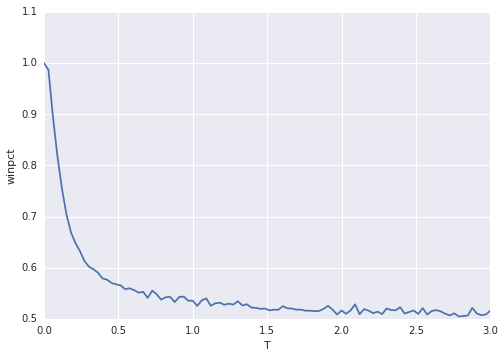

In [6]:
plotwins('Cincinnati','Purdue')

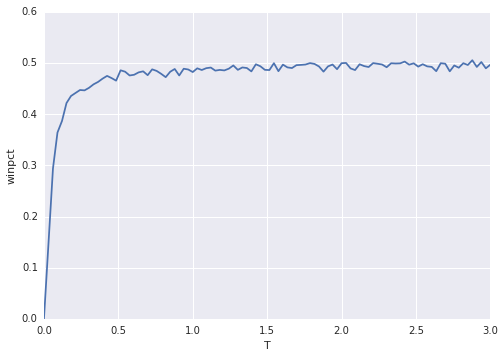

In [7]:
plotwins('Oregon','Oklahoma St.')

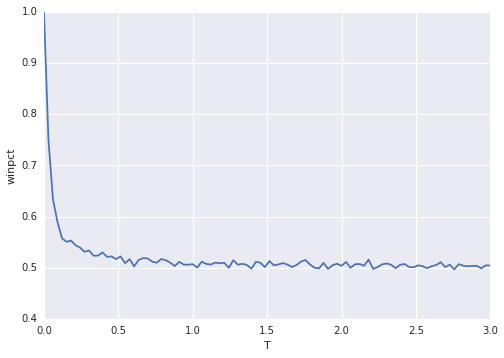

In [8]:
plotwins('North Carolina St.','LSU')

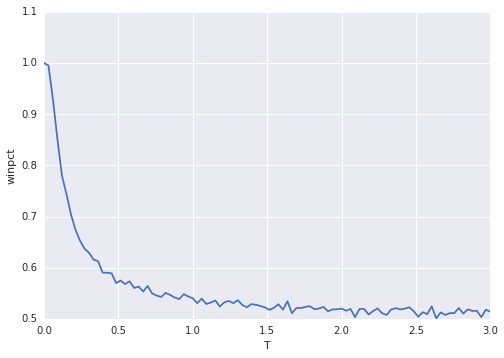

In [9]:
plotwins('San Diego St.',"St. John's")

So, just eyeballing that, it looks like we could pick T=1.5 to 2.0 to get this. What does that do to "clear" matchups?

In [10]:
MarchMadnessMonteCarlo.examples.log5_energy_game('Kentucky','Kansas')

-0.8176307825952608

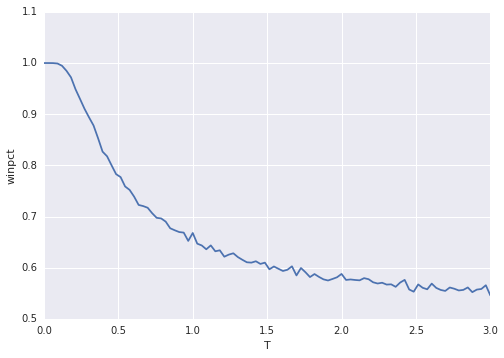

In [11]:
plotwins('Kentucky','Kansas')

That seems legit. If I pick `T=1.5`, I still get Kentucky, the favorite, winning 60% of the time. So what does a bracket happen to look like?

In [12]:
results = MMMC.runbracket2(ntrials1=10000,ntrials2=1000,T=1.5)

YOUR LOWEST ENERGY BRACKETS
LOWEST ENERGY BRACKET FOR REGION midwest
Kentucky (1)                                                 
Hampton (16)              Ken (1)                            
Cincinnati (8)                                               
Purdue (9)                Cin (8)  Ken (1)                   
West Virginia (5)                                            
Buffalo (12)              Wes (5)                            
Maryland (4)                                                 
Valparaiso (13)           Mar (4)  Wes (5)  Ken (1)          
Butler (6)                Tex (11) Not (3)  Not (3)  Ken (1) 
Texas (11)                                                   
Notre Dame (3)            Not (3)                            
Northeastern (14)                                            
Wichita St. (7)           Wic (7)  Kan (2)                   
Indiana (10)                                                 
Kansas (2)                Kan (2)                            
N

So, not looking so hot for my Kansas, but the code is working.

Let's visualize the results, then make a table of results, as per [538](http://fivethirtyeight.com/interactives/march-madness-predictions-2015/#mens).

Later on, we could make a fancy energy function with, e.g., a weighted average of KenPom, Jeff Sagarin, and the NCAA rankings. 

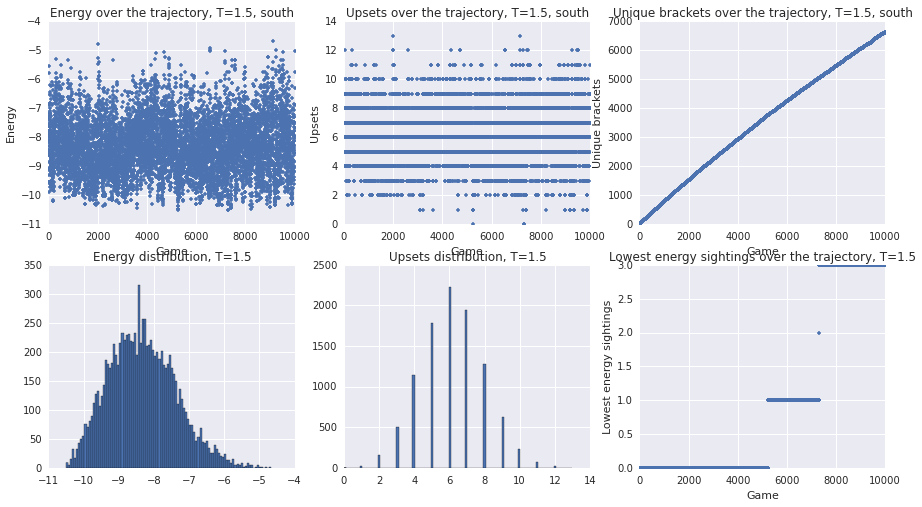

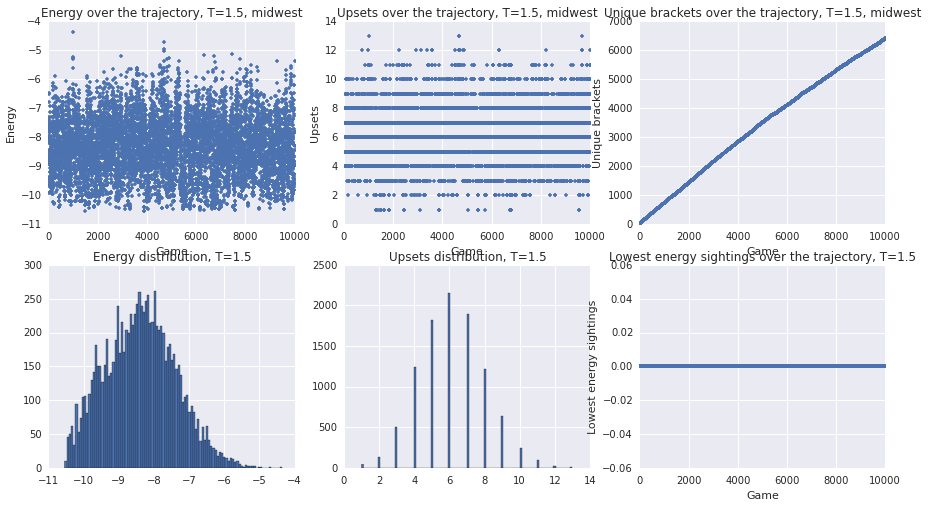

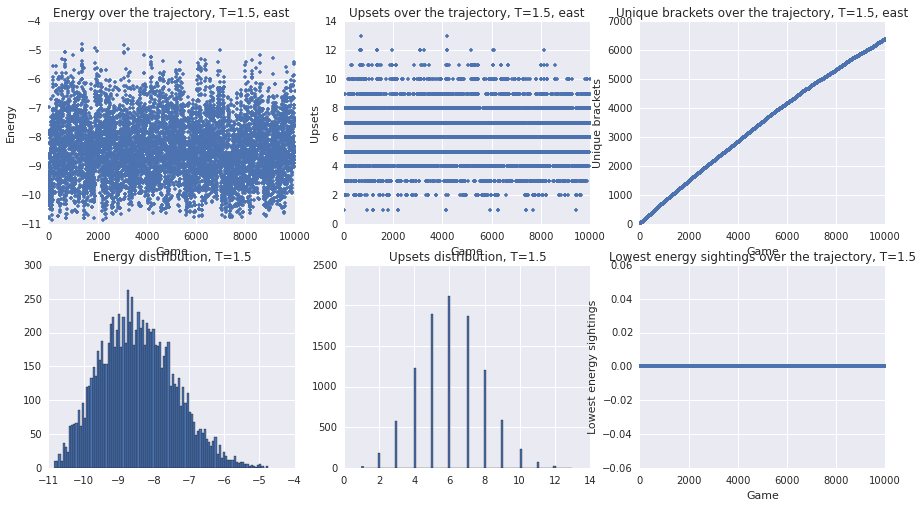

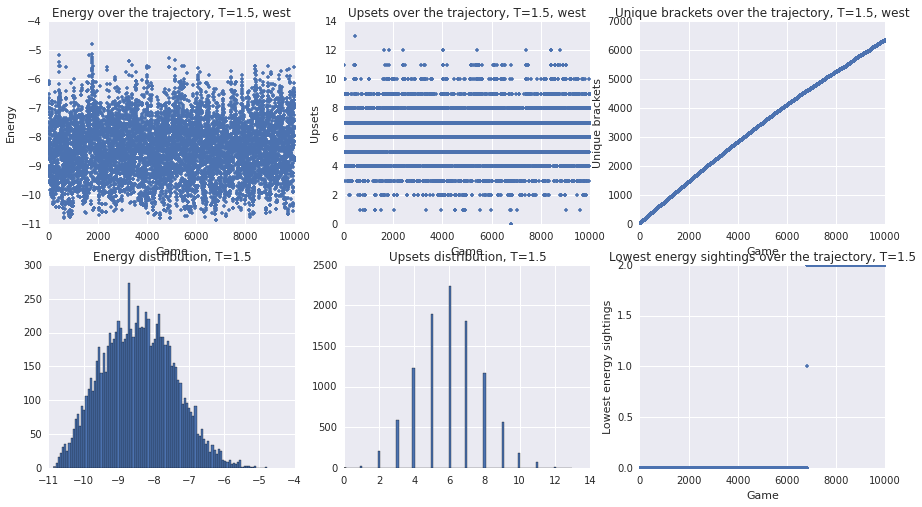

In [13]:
# Basic visualization
MMMC.showstats(results['south'],description='south',newfig=True)
MMMC.showstats(results['midwest'],description='midwest',newfig=True)
MMMC.showstats(results['east'],description='east',newfig=True)
MMMC.showstats(results['west'],description='west',newfig=True)

And here's our set of tabulated results. Note that things look a little funny for the Final Four: `runbracket2` runs the final four separate from the rest of the tourney. So, only four teams are allowed to have Championship and Win percentages above zero (the final four percentages are taken from the first chunk of the tourney).

In [18]:
h = HTML(MMMC.maketable(results))

<table>
<tr><th>Team              </th><th style="text-align: right;">  2nd Round</th><th style="text-align: right;">  3rd Round</th><th style="text-align: right;">  Sweet 16</th><th style="text-align: right;">  Elite 8</th><th style="text-align: right;">  Final 4</th><th style="text-align: right;">  Championship</th><th style="text-align: right;">  Win</th></tr>
<tr><td>Oklahoma          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.621</td><td style="text-align: right;">     0.349</td><td style="text-align: right;">    0.193</td><td style="text-align: right;">    0.12 </td><td style="text-align: right;">          0.59</td><td style="text-align: right;"> 0.3 </td></tr>
<tr><td>Wisconsin         </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.621</td><td style="text-align: right;">     0.325</td><td style="text-align: right;">    0.203</td><td style="text-align: right;">    0.12 </td><td style="text-align: right;">          0.53</td><td style="text-align: right;"> 0.27</td></tr>
<tr><td>Kentucky          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.642</td><td style="text-align: right;">     0.432</td><td style="text-align: right;">    0.253</td><td style="text-align: right;">    0.156</td><td style="text-align: right;">          0.47</td><td style="text-align: right;"> 0.27</td></tr>
<tr><td>Duke              </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.734</td><td style="text-align: right;">     0.446</td><td style="text-align: right;">    0.246</td><td style="text-align: right;">    0.142</td><td style="text-align: right;">          0.41</td><td style="text-align: right;"> 0.16</td></tr>
<tr><td>Arizona           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.655</td><td style="text-align: right;">     0.399</td><td style="text-align: right;">    0.272</td><td style="text-align: right;">    0.183</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Virginia          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.653</td><td style="text-align: right;">     0.365</td><td style="text-align: right;">    0.233</td><td style="text-align: right;">    0.137</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Utah              </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.597</td><td style="text-align: right;">     0.427</td><td style="text-align: right;">    0.224</td><td style="text-align: right;">    0.132</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Northern Iowa     </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.659</td><td style="text-align: right;">     0.369</td><td style="text-align: right;">    0.236</td><td style="text-align: right;">    0.123</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Villanova         </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.636</td><td style="text-align: right;">     0.296</td><td style="text-align: right;">    0.179</td><td style="text-align: right;">    0.113</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Gonzaga           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.508</td><td style="text-align: right;">     0.287</td><td style="text-align: right;">    0.179</td><td style="text-align: right;">    0.104</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Kansas            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.689</td><td style="text-align: right;">     0.381</td><td style="text-align: right;">    0.194</td><td style="text-align: right;">    0.103</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Notre Dame        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.629</td><td style="text-align: right;">     0.314</td><td style="text-align: right;">    0.179</td><td style="text-align: right;">    0.103</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Ohio St.          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.583</td><td style="text-align: right;">     0.303</td><td style="text-align: right;">    0.181</td><td style="text-align: right;">    0.095</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Iowa              </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.506</td><td style="text-align: right;">     0.275</td><td style="text-align: right;">    0.159</td><td style="text-align: right;">    0.094</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Xavier            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.562</td><td style="text-align: right;">     0.344</td><td style="text-align: right;">    0.171</td><td style="text-align: right;">    0.09 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Iowa St.          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.617</td><td style="text-align: right;">     0.316</td><td style="text-align: right;">    0.165</td><td style="text-align: right;">    0.09 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>North Carolina    </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.633</td><td style="text-align: right;">     0.36 </td><td style="text-align: right;">    0.176</td><td style="text-align: right;">    0.083</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>San Diego St.     </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.574</td><td style="text-align: right;">     0.307</td><td style="text-align: right;">    0.173</td><td style="text-align: right;">    0.083</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Texas             </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.528</td><td style="text-align: right;">     0.279</td><td style="text-align: right;">    0.141</td><td style="text-align: right;">    0.079</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Buffalo           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.465</td><td style="text-align: right;">     0.276</td><td style="text-align: right;">    0.161</td><td style="text-align: right;">    0.075</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Louisville        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.563</td><td style="text-align: right;">     0.295</td><td style="text-align: right;">    0.14 </td><td style="text-align: right;">    0.071</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Oregon            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.606</td><td style="text-align: right;">     0.296</td><td style="text-align: right;">    0.158</td><td style="text-align: right;">    0.07 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>LSU               </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.597</td><td style="text-align: right;">     0.342</td><td style="text-align: right;">    0.155</td><td style="text-align: right;">    0.07 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Michigan St.      </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.477</td><td style="text-align: right;">     0.303</td><td style="text-align: right;">    0.135</td><td style="text-align: right;">    0.07 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Georgia           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.523</td><td style="text-align: right;">     0.257</td><td style="text-align: right;">    0.135</td><td style="text-align: right;">    0.07 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Wichita St.       </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.487</td><td style="text-align: right;">     0.254</td><td style="text-align: right;">    0.137</td><td style="text-align: right;">    0.069</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>SMU               </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.396</td><td style="text-align: right;">     0.215</td><td style="text-align: right;">    0.124</td><td style="text-align: right;">    0.068</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Baylor            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.638</td><td style="text-align: right;">     0.306</td><td style="text-align: right;">    0.126</td><td style="text-align: right;">    0.067</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Davidson          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.494</td><td style="text-align: right;">     0.263</td><td style="text-align: right;">    0.139</td><td style="text-align: right;">    0.066</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Arkansas          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.577</td><td style="text-align: right;">     0.279</td><td style="text-align: right;">    0.141</td><td style="text-align: right;">    0.064</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>UCLA              </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.604</td><td style="text-align: right;">     0.323</td><td style="text-align: right;">    0.141</td><td style="text-align: right;">    0.063</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Butler            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.472</td><td style="text-align: right;">     0.255</td><td style="text-align: right;">    0.129</td><td style="text-align: right;">    0.063</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Providence        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.552</td><td style="text-align: right;">     0.294</td><td style="text-align: right;">    0.124</td><td style="text-align: right;">    0.063</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>West Virginia     </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.535</td><td style="text-align: right;">     0.246</td><td style="text-align: right;">    0.123</td><td style="text-align: right;">    0.062</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Maryland          </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.515</td><td style="text-align: right;">     0.262</td><td style="text-align: right;">    0.114</td><td style="text-align: right;">    0.062</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Oklahoma St.      </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.394</td><td style="text-align: right;">     0.243</td><td style="text-align: right;">    0.146</td><td style="text-align: right;">    0.057</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Cincinnati        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.482</td><td style="text-align: right;">     0.231</td><td style="text-align: right;">    0.111</td><td style="text-align: right;">    0.051</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>North Carolina St.</td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.403</td><td style="text-align: right;">     0.25 </td><td style="text-align: right;">    0.105</td><td style="text-align: right;">    0.051</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Georgetown        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.536</td><td style="text-align: right;">     0.248</td><td style="text-align: right;">    0.111</td><td style="text-align: right;">    0.049</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>VCU               </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.417</td><td style="text-align: right;">     0.202</td><td style="text-align: right;">    0.097</td><td style="text-align: right;">    0.049</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Stephen F. Austin </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.403</td><td style="text-align: right;">     0.196</td><td style="text-align: right;">    0.098</td><td style="text-align: right;">    0.048</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Purdue            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.518</td><td style="text-align: right;">     0.187</td><td style="text-align: right;">    0.094</td><td style="text-align: right;">    0.048</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Indiana           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.513</td><td style="text-align: right;">     0.219</td><td style="text-align: right;">    0.101</td><td style="text-align: right;">    0.047</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Dayton            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.448</td><td style="text-align: right;">     0.245</td><td style="text-align: right;">    0.109</td><td style="text-align: right;">    0.045</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>BYU               </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.438</td><td style="text-align: right;">     0.22 </td><td style="text-align: right;">    0.09 </td><td style="text-align: right;">    0.043</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Valparaiso        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.485</td><td style="text-align: right;">     0.216</td><td style="text-align: right;">    0.083</td><td style="text-align: right;">    0.031</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>UC Irvine         </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.437</td><td style="text-align: right;">     0.159</td><td style="text-align: right;">    0.074</td><td style="text-align: right;">    0.025</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>St. John's        </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.426</td><td style="text-align: right;">     0.155</td><td style="text-align: right;">    0.07 </td><td style="text-align: right;">    0.024</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Georgia St.       </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.362</td><td style="text-align: right;">     0.13 </td><td style="text-align: right;">    0.048</td><td style="text-align: right;">    0.023</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Wofford           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.423</td><td style="text-align: right;">     0.198</td><td style="text-align: right;">    0.065</td><td style="text-align: right;">    0.022</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Northeastern      </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.371</td><td style="text-align: right;">     0.152</td><td style="text-align: right;">    0.062</td><td style="text-align: right;">    0.02 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Harvard           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.367</td><td style="text-align: right;">     0.163</td><td style="text-align: right;">    0.06 </td><td style="text-align: right;">    0.019</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Manhattan         </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.358</td><td style="text-align: right;">     0.15 </td><td style="text-align: right;">    0.061</td><td style="text-align: right;">    0.017</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Albany            </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.379</td><td style="text-align: right;">     0.112</td><td style="text-align: right;">    0.049</td><td style="text-align: right;">    0.017</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Wyoming           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.341</td><td style="text-align: right;">     0.177</td><td style="text-align: right;">    0.057</td><td style="text-align: right;">    0.016</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>New Mexico St.    </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.311</td><td style="text-align: right;">     0.146</td><td style="text-align: right;">    0.057</td><td style="text-align: right;">    0.014</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>North Dakota St.  </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.492</td><td style="text-align: right;">     0.175</td><td style="text-align: right;">    0.053</td><td style="text-align: right;">    0.014</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Coastal Carolina  </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.379</td><td style="text-align: right;">     0.136</td><td style="text-align: right;">    0.051</td><td style="text-align: right;">    0.013</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Eastern Washington</td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.464</td><td style="text-align: right;">     0.129</td><td style="text-align: right;">    0.055</td><td style="text-align: right;">    0.011</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>UAB               </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.383</td><td style="text-align: right;">     0.146</td><td style="text-align: right;">    0.04 </td><td style="text-align: right;">    0.01 </td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Lafayette         </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.364</td><td style="text-align: right;">     0.112</td><td style="text-align: right;">    0.054</td><td style="text-align: right;">    0.005</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Belmont           </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.347</td><td style="text-align: right;">     0.075</td><td style="text-align: right;">    0.022</td><td style="text-align: right;">    0.004</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Robert Morris     </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.266</td><td style="text-align: right;">     0.092</td><td style="text-align: right;">    0.023</td><td style="text-align: right;">    0.002</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
<tr><td>Texas Southern    </td><td style="text-align: right;">          1</td><td style="text-align: right;">      0.345</td><td style="text-align: right;">     0.096</td><td style="text-align: right;">    0.015</td><td style="text-align: right;">    0.002</td><td style="text-align: right;">          0   </td><td style="text-align: right;"> 0   </td></tr>
</table>

Given those concerns, let's just run `runbracket1` and look at the results

In [20]:
results = MMMC.runbracket1(ntrials=10000,T=1.5)

Lowest energy bracket
Kentucky (1)                                                                   
Hampton (16)              Ken (1)                                              
Cincinnati (8)                                                                 
Purdue (9)                Cin (8)  Ken (1)                                     
West Virginia (5)                                                              
Buffalo (12)              Wes (5)                                              
Maryland (4)                                                                   
Valparaiso (13)           Mar (4)  Wes (5)  Ken (1)                            
Butler (6)                                                                     
Texas (11)                Tex (11)                                             
Notre Dame (3)                                                                 
Northeastern (14)         Not (3)  Not (3)                                     
Wichita St. (7)   

In [22]:
h = HTML(MMMC.maketable(results))
h

Team,2nd Round,3rd Round,Sweet 16,Elite 8,Final 4,Championship,Win
Arizona,1.0,0.6545,0.4085,0.2639,0.1559,0.0938,0.0525
Wisconsin,1.0,0.6565,0.3757,0.2119,0.1298,0.0773,0.0474
Kentucky,1.0,0.7185,0.4366,0.2666,0.1449,0.0799,0.0454
Virginia,1.0,0.6134,0.3439,0.1841,0.1221,0.0699,0.0384
Villanova,1.0,0.6573,0.3538,0.2305,0.1328,0.0721,0.0362
Duke,1.0,0.6794,0.4031,0.2264,0.1216,0.068,0.0359
Utah,1.0,0.5465,0.3494,0.2225,0.1269,0.0665,0.0351
Gonzaga,1.0,0.6371,0.355,0.1962,0.1104,0.0629,0.0342
Oklahoma,1.0,0.5475,0.3303,0.1853,0.1119,0.0587,0.0332
Kansas,1.0,0.5995,0.3013,0.1596,0.0969,0.0557,0.0298


That is, indeed, high temperature! Let's try it with a bunch more runs

In [23]:
results = MMMC.runbracket1(ntrials=100000,T=1.5)

Lowest energy bracket
Kentucky (1)                                                                   
Hampton (16)              Ken (1)                                              
Cincinnati (8)                                                                 
Purdue (9)                Cin (8)  Ken (1)                                     
West Virginia (5)                                                              
Buffalo (12)              Wes (5)                                              
Maryland (4)                                                                   
Valparaiso (13)           Mar (4)  Wes (5)  Ken (1)                            
Butler (6)                                                                     
Texas (11)                Tex (11)                                             
Notre Dame (3)                                                                 
Northeastern (14)         Not (3)  Not (3)                                     
Wichita St. (7)   

In [24]:
h = HTML(MMMC.maketable(results))
h

Team,2nd Round,3rd Round,Sweet 16,Elite 8,Final 4,Championship,Win
Kentucky,1.0,0.71472,0.44521,0.27168,0.15816,0.09132,0.05216
Villanova,1.0,0.65775,0.40149,0.24469,0.14377,0.08169,0.04654
Arizona,1.0,0.699,0.39475,0.22645,0.13269,0.07556,0.04276
Virginia,1.0,0.62786,0.3479,0.21081,0.12291,0.07127,0.04083
Wisconsin,1.0,0.64541,0.3715,0.2223,0.12629,0.07113,0.03983
Duke,1.0,0.64198,0.35191,0.19851,0.11488,0.06376,0.03567
Gonzaga,1.0,0.62069,0.35685,0.19943,0.11006,0.06056,0.03323
Utah,1.0,0.56623,0.34026,0.19561,0.10922,0.05964,0.03258
Northern Iowa,1.0,0.60393,0.3403,0.1944,0.10774,0.05772,0.0303
North Carolina,1.0,0.56076,0.33359,0.18193,0.09697,0.0513,0.02718


Not bad!

But let's be honest for a minute. We all know Kansas is going to win. What do the brackets where that happened look like?

In [38]:
goodbrackets = [i for i in results['all'].brackets if i.bracket[-1][0] == 'Kansas']

In [46]:
from MarchMadnessMonteCarlo.Brackets import Stats
lb, mcb, mcb_count, unique_brackets, lowest_sightings = Stats.gather_uniquestats(goodbrackets)
sr = MMMC.SimulationResults(goodbrackets,unique_brackets,lb,lowest_sightings,mcb,mcb_count)
trueresults = {'all':sr}

In [47]:
h = HTML(MMMC.maketable(trueresults))
h

Team,2nd Round,3rd Round,Sweet 16,Elite 8,Final 4,Championship,Win
Kansas,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Villanova,1.0,0.666298342541,0.409944751381,0.257826887661,0.148066298343,0.0810313075506,0.0
Virginia,1.0,0.637200736648,0.329650092081,0.202578268877,0.113443830571,0.0648250460405,0.0
Arizona,1.0,0.706077348066,0.411418047882,0.22394106814,0.116758747698,0.0626151012891,0.0
Northern Iowa,1.0,0.596685082873,0.341436464088,0.184898710866,0.100552486188,0.0570902394107,0.0
Oklahoma,1.0,0.606629834254,0.330018416206,0.183425414365,0.100552486188,0.0567219152855,0.0
Wisconsin,1.0,0.637569060773,0.361694290976,0.198895027624,0.102025782689,0.0548802946593,0.0
Providence,1.0,0.517863720074,0.279926335175,0.137753222836,0.0843462246777,0.0519337016575,0.0
North Carolina,1.0,0.57532228361,0.319337016575,0.191896869245,0.0939226519337,0.0478821362799,0.0
Baylor,1.0,0.554696132597,0.296869244936,0.155432780847,0.0968692449355,0.0434622467772,0.0


In [48]:
sr.most_common_bracket

Kentucky (1)                                                                   
Hampton (16)              Ham (16)                                             
Cincinnati (8)                                                                 
Purdue (9)                Pur (9)  Pur (9)                                     
West Virginia (5)                                                              
Buffalo (12)              Buf (12)                                             
Maryland (4)                                                                   
Valparaiso (13)           Mar (4)  Buf (12) Pur (9)                            
Butler (6)                                                                     
Texas (11)                Tex (11)                                             
Notre Dame (3)                                                                 
Northeastern (14)         Not (3)  Not (3)                                     
Wichita St. (7)                         

In [50]:
sr.most_common_bracket_count

5

Huh. Well, that's not exactly my pick for best bracket, but there you have it.